<a href="https://colab.research.google.com/github/MariaHerreraVaz/ProgramacionADP-Colab/blob/main/Practica_21_263142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 21**
---
---


**Nombre de alumno:** María del Carmen Herrera Vázquez

**Matricula:** 263142

---

**Analisis predictivo**

Primeras etapas del procesamiento de los datos.

## **Ejercicio 1:** Normalización Min-Max

### **1.**	Cargar el dataset wine de sklearn.

In [1]:
#descarga del dataset
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
wine = load_wine()
df1 = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df1.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### **2.**	Seleccionar una de las características numéricas (por ejemplo, alcohol).

In [2]:
#seleccionar la caracteristica de alcohol
alcohol = df1['alcohol']
print(alcohol.head())

0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: alcohol, dtype: float64


### **3.**	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.


In [3]:
#prueba de normalidad
from scipy.stats import shapiro
stat1, p1 = shapiro(alcohol)
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Parece seguir una distribucion normal')
else:
	print('No sigue una distribucion normal')

stat=0.982, p=0.020
No sigue una distribucion normal


### **4.**	Aplicar la normalización Min-Max a los datos seleccionados.


In [4]:
#normalizacion MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
alcohol_norm = scaler.fit_transform(alcohol.values.reshape(-1, 1))

#realizamos conversion a dataframe para visualizarlo bien
df1['alcohol_norm'] = alcohol_norm

### **5.**	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.


In [5]:
#pruebas de normalidad
stat1, p1 = shapiro(alcohol_norm)
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
	print('Parece seguir una distribucion normal')
else:
	print('No sigue una distribucion normal')

stat=0.982, p=0.020
No sigue una distribucion normal


### **6.**	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.


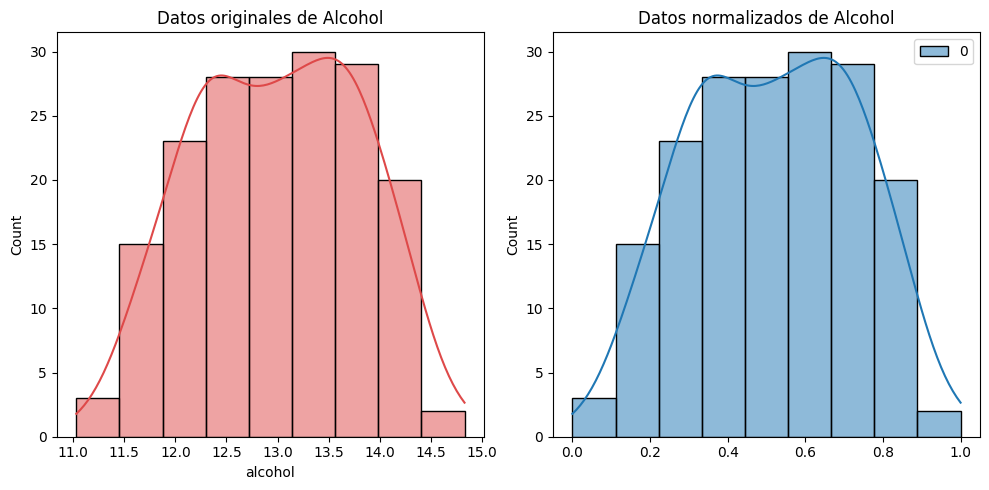

In [25]:
#graficar datos originales vs normalizados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(alcohol, kde=True, color='#DE4949')
plt.title('Datos originales de Alcohol')

plt.subplot(1, 2, 2)
sns.histplot(alcohol_norm, kde=True, color='#C74242')
plt.title('Datos normalizados de Alcohol')

plt.tight_layout()
plt.show()

### **7.** Preguntas

**1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?**

No hubo alteraciones de los datos por los datos sesgados.



**2. ¿Qué interpretas del p-valor antes y después de la normalización?**

Antes: el valor de p era menor que el 0.05, es decir que no sigue una distribucion normal.

Despues: el valor de p despues de ser normalizado siguio siendo menor que el 0.05, entonces no hubo diferencia.

## **Ejercicio 2:** Normalización Z-Score




### **1.**	Cargar el dataset wine de sklearn.


In [7]:
#carga del dataset
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
wine = load_wine()
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df2.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### **2.**	Seleccionar una de las características numéricas (por ejemplo, malic_acid).

In [8]:
#seleccionamos la caracteristica numerica malic_acid
malic_acid = df2['malic_acid']
print(malic_acid.describe())

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64


### **3.**	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.


In [9]:
#prueba de normalidad sobre los datos originales
from scipy.stats import shapiro
stat2, p2 = shapiro(malic_acid)
print('stat=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05:
	print('Parece seguir una distribucion normal')
else:
	print('No sigue una distribucion normal')

stat=0.889, p=0.000
No sigue una distribucion normal


### **4.**	Aplicar la normalización Z-Score a los datos seleccionados.


In [10]:
#aplicar normalizacion Z score a los datos seleccionados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
malic_acid_norm = scaler.fit_transform(malic_acid.values.reshape(-1, 1))

#agregamos una nueva columna normalizada para guardar la info
df2['malic_acid_norm'] = malic_acid_norm

### **5.**	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.


In [11]:
#prueba de normalidad otra vez sobre los datos normalizados (Z score normalizado)
stat22, p22 = shapiro(malic_acid_norm)
print('stat=%.3f, p=%.3f' % (stat22, p22))
if p22 > 0.05:
	print('Parece seguir una distribucion normal')
else:
	print('No sigue una distribucion normal')

stat=0.889, p=0.000
No sigue una distribucion normal


### **6.**	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.


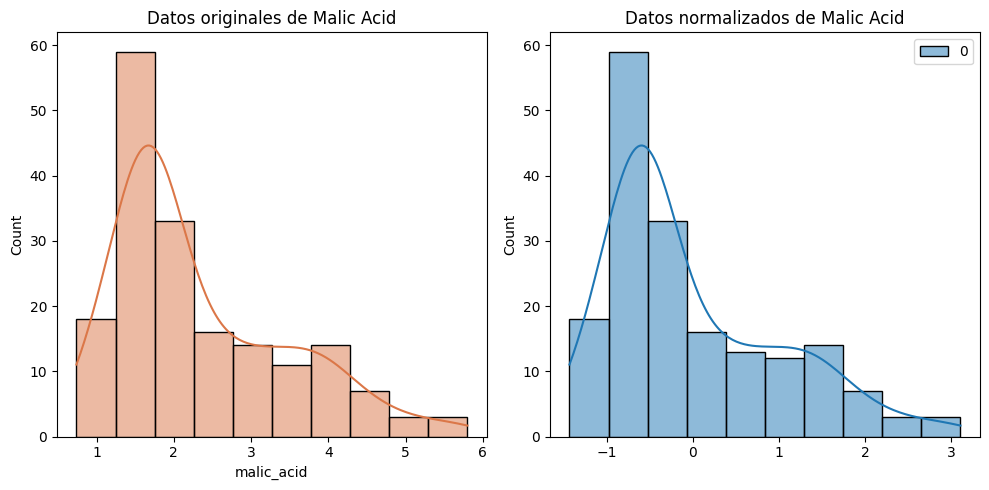

In [26]:
#graficar los valores originales y normalizados utilizando mathplotlib o seaborn
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(malic_acid, kde=True, color='#DB7748')
plt.title('Datos originales de Malic Acid')

plt.subplot(1, 2, 2)
sns.histplot(malic_acid_norm, kde=True, color='#C76C42')
plt.title('Datos normalizados de Malic Acid')

plt.tight_layout()
plt.show()

### **7.**	Preguntas


**1. ¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**

**Original:** los datos de la columna malic_acid son distintos del 0.

**Normalizada:** De igual forma, aun despues de la normalizacion no hubo cambios en la distribucion (unos muy leves) pero la curva de la linea sigue siendo igual que la original.

**2. ¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**

Pues con esta normalización (Z score) hace que los datos que estan cercas del 0 y aparte de su escabilidad (sin hacer alteraciones de la distribucion) puede ser funcional para los metodos estadisticos que necesitan variables en escala.

## **Ejercicio 3:** Transformación Logarítmica



### **1.**	Cargar un conjunto de datos aleatorios generados con numpy.


In [13]:
#Carga de conjunto de datos aleatorios generados con numpy
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.exponential(scale=2, size=100)
print(data)

[0.93853618 6.02024286 2.63349139 1.82588511 0.33924974 0.33919258
 0.11967754 4.02246173 1.83816431 2.46250012 0.04159862 7.00711495
 3.57285909 0.47737525 0.40135798 0.40522285 0.72550746 1.48785566
 1.13107413 0.68844599 1.89274175 0.30046906 0.69103102 0.91255444
 1.21786938 3.07587202 0.44547172 1.44405831 1.79500944 0.0951277
 1.87066604 0.3739225  0.13452786 5.94737559 6.74126068 3.30466315
 0.72657572 0.20555463 2.30550153 1.16018169 0.26030447 1.36709446
 0.06998744 4.80084577 0.59891555 2.1725116  0.74709316 1.46822179
 1.5824476  0.4087772  6.98561427 2.98449075 5.61018884 4.504304
 1.82210882 5.09887076 0.18531092 0.43626939 0.09256393 0.78706417
 0.98426058 0.63312089 3.52911573 0.882454   0.65960568 1.56481417
 0.3037963  3.24096719 0.15495174 8.66829268 2.95896755 0.44307888
 0.01107484 3.37979355 2.45419181 2.61132582 2.95042905 0.15385853
 0.88778534 0.24630021 3.97705914 1.95260238 0.8036376  0.13133613
 0.7449767  0.78662843 2.61575157 2.02977872 4.36450382 1.2781322

### **2.**	Aplicar una transformación logarítmica (np.log) a los datos.


In [14]:
#aplicar una transformacion logaritmica (np.log) a los datos
data_log = np.log(data)

df3 = pd.DataFrame(data, columns=['data'])
df3['data_log'] = data_log
print(df3.head())

       data  data_log
0  0.938536 -0.063434
1  6.020243  1.795128
2  2.633491  0.968310
3  1.825885  0.602065
4  0.339250 -1.081019


### **3.**	Realizar una prueba de normalidad sobre los datos originales y transformados.


In [15]:
#realizar una prueba de normalidad (Shapiro-Wilk) sobre los datos originales y transformados
from scipy.stats import shapiro

#datos originales
stat4, p4 = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat4, p4))

#datos transformados
stat5, p5 = shapiro(data_log)
print('stat=%.3f, p=%.3f' % (stat5, p5))

if p4 > 0.05:
	print('Original-Parece seguir una distribucion normal')
else:
	print('Original-No sigue una distribucion normal')


if p5 > 0.05:
	print('Normalizado-Parece seguir una distribucion normal')
else:
	print('Normalizado-No sigue una distribucion normal')

stat=0.836, p=0.000
stat=0.959, p=0.003
Original-No sigue una distribucion normal
Normalizado-No sigue una distribucion normal


### **4.**	Graficar los datos originales y transformados utilizando matplotlib.


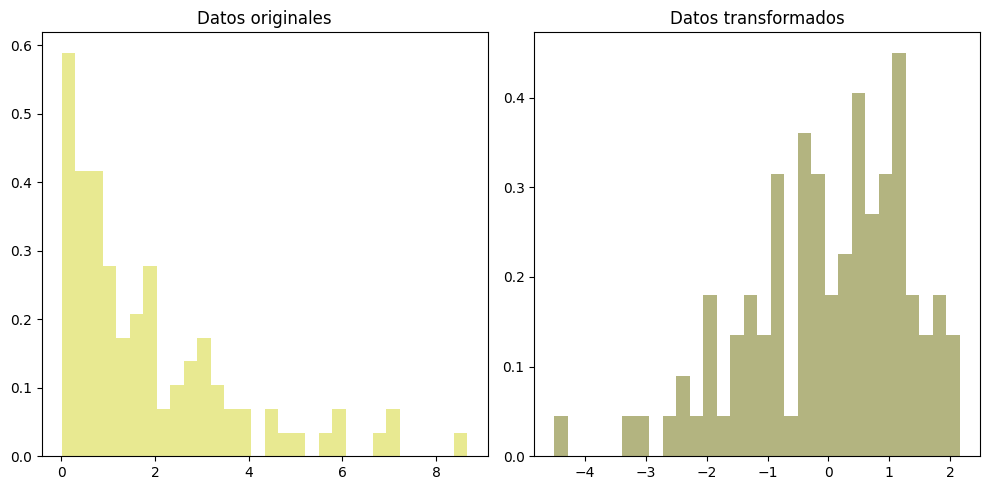

In [28]:
#graficar los datos originales y transformados utilizando matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='#D9DB48')
plt.title('Datos originales')

plt.subplot(1, 2, 2)
plt.hist(data_log, bins=30, density=True, alpha=0.6, color='#81822B')
plt.title('Datos transformados')

plt.tight_layout()
plt.show()

### **5.**	Preguntas


**1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?**

Con la transformacion logaritmica redujo la simetria de la grafica (el que esta el pico hacia la izquierda). Con esto los valores se hacen mas "pequeños" y se puede semejar a la campana de Gauss.

Tomando en cuenta que el original esta mas hacia la izquierda, ya con la normalización se ve mas simetrica.

**2. ¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**

**Antes:** el valor de p era muy bajo del 0.05 dando a entender que no estaba normalizado.

**Despues:** el valor de p aumenta y muchos casos superaban del 0.05, dando a entender que los datos se estaban semenajndo a una distribucion normal.

## **Ejercicio 4:** Transformación Raíz Cuadrada

### **1.**	Cargar un conjunto de datos aleatorios generados con numpy.

In [17]:
#cargar el conjunto de datos aleatorios generados con numpy
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.exponential(scale=2, size=100)
print(data)

[0.93853618 6.02024286 2.63349139 1.82588511 0.33924974 0.33919258
 0.11967754 4.02246173 1.83816431 2.46250012 0.04159862 7.00711495
 3.57285909 0.47737525 0.40135798 0.40522285 0.72550746 1.48785566
 1.13107413 0.68844599 1.89274175 0.30046906 0.69103102 0.91255444
 1.21786938 3.07587202 0.44547172 1.44405831 1.79500944 0.0951277
 1.87066604 0.3739225  0.13452786 5.94737559 6.74126068 3.30466315
 0.72657572 0.20555463 2.30550153 1.16018169 0.26030447 1.36709446
 0.06998744 4.80084577 0.59891555 2.1725116  0.74709316 1.46822179
 1.5824476  0.4087772  6.98561427 2.98449075 5.61018884 4.504304
 1.82210882 5.09887076 0.18531092 0.43626939 0.09256393 0.78706417
 0.98426058 0.63312089 3.52911573 0.882454   0.65960568 1.56481417
 0.3037963  3.24096719 0.15495174 8.66829268 2.95896755 0.44307888
 0.01107484 3.37979355 2.45419181 2.61132582 2.95042905 0.15385853
 0.88778534 0.24630021 3.97705914 1.95260238 0.8036376  0.13133613
 0.7449767  0.78662843 2.61575157 2.02977872 4.36450382 1.2781322

### **2.**	Aplicar una transformación de raíz cuadrada a los datos.


In [18]:
#aplicar una transformacion de raiz cuadrada a los datos
data_sqrt = np.sqrt(data)

df4 = pd.DataFrame(data, columns=['data'])
df4['data_sqrt'] = data_sqrt
print(df4.head())

       data  data_sqrt
0  0.938536   0.968781
1  6.020243   2.453618
2  2.633491   1.622804
3  1.825885   1.351253
4  0.339250   0.582451


### **3.**	Realizar una prueba de normalidad sobre los datos originales y transformados.

In [19]:
#realizar una prueba de normalidad sobre los datos originales y transformados
from scipy.stats import shapiro

#datos originales
stat5, p5 = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat5, p5))

#datos transformados
stat6, p6 = shapiro(data_sqrt)
print('stat=%.3f, p=%.3f' % (stat6, p6))

if p5 > 0.05:
	print('Original-Parece seguir una distribucion normal')
else:
	print('Original-No sigue una distribucion normal')


if p6 > 0.05:
	print('Normalizado-Parece seguir una distribucion normal')
else:
	print('Normalizado-No sigue una distribucion normal')

stat=0.836, p=0.000
stat=0.963, p=0.007
Original-No sigue una distribucion normal
Normalizado-No sigue una distribucion normal


### **4.**	Graficar los datos originales y transformados utilizando matplotlib.


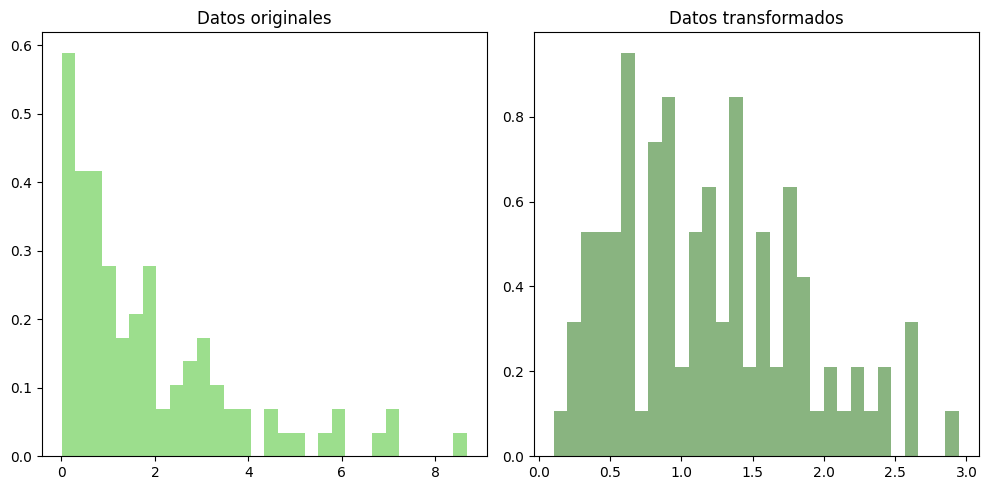

In [29]:
#graficar los datos originales y transformados utilizando matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='#5BC942')
plt.title('Datos originales')

plt.subplot(1, 2, 2)
plt.hist(data_sqrt, bins=30, density=True, alpha=0.6, color='#3B822B')
plt.title('Datos transformados')

plt.tight_layout()
plt.show()

### **5.**	Preguntas

**1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**

Con la raiz cuadrada hizo que la distribucion se fuera semejando a una distribucion normal, es decir un poco mas simetrica pero no de la misma manera que usando el logarimo.

**2. ¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**

Con el uso de la raiz cuadrada se redujo los valores grandes que se muestran el la grafica original, entonces esos valores grandes perdieran su tamaño y beneficiando a los que tenian nulo o bajo valor.

## **Ejercicio 5:** Transformación Box-Cox



### **1.**	Cargar un conjunto de datos aleatorios generados con numpy.

In [21]:
#cargar un conjunto de datos aleatorios generados con numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
data = np.random.exponential(scale=2, size=100)
print(data)

[0.93853618 6.02024286 2.63349139 1.82588511 0.33924974 0.33919258
 0.11967754 4.02246173 1.83816431 2.46250012 0.04159862 7.00711495
 3.57285909 0.47737525 0.40135798 0.40522285 0.72550746 1.48785566
 1.13107413 0.68844599 1.89274175 0.30046906 0.69103102 0.91255444
 1.21786938 3.07587202 0.44547172 1.44405831 1.79500944 0.0951277
 1.87066604 0.3739225  0.13452786 5.94737559 6.74126068 3.30466315
 0.72657572 0.20555463 2.30550153 1.16018169 0.26030447 1.36709446
 0.06998744 4.80084577 0.59891555 2.1725116  0.74709316 1.46822179
 1.5824476  0.4087772  6.98561427 2.98449075 5.61018884 4.504304
 1.82210882 5.09887076 0.18531092 0.43626939 0.09256393 0.78706417
 0.98426058 0.63312089 3.52911573 0.882454   0.65960568 1.56481417
 0.3037963  3.24096719 0.15495174 8.66829268 2.95896755 0.44307888
 0.01107484 3.37979355 2.45419181 2.61132582 2.95042905 0.15385853
 0.88778534 0.24630021 3.97705914 1.95260238 0.8036376  0.13133613
 0.7449767  0.78662843 2.61575157 2.02977872 4.36450382 1.2781322

### **2.**	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.


In [22]:
#aplicar la transformacion box-cox a los datos utilizando scipy.stats.boxcox
from scipy.stats import boxcox

#transformacion Box-Cox
data_boxcox, lambda_boxcox = boxcox(data)

print(f"el valor de lambda que se obtuvo: {lambda_boxcox:.3f}")#.3 es cantidad de decimales

#dataframe
df5 = pd.DataFrame(data, columns=['data'])
df5['data_boxcox'] = data_boxcox
print(df5.head())

el valor de lambda que se obtuvo: 0.231
       data  data_boxcox
0  0.938536    -0.062970
1  6.020243     2.225621
2  2.633491     1.085419
3  1.825885     0.646039
4  0.339250    -0.956371


### **3.**	Realizar una prueba de normalidad sobre los datos originales y transformados.

In [23]:
#realizar una prueba  de normalidad sobre los datos originales y trasformados
from scipy.stats import shapiro

#datos originales
stat7, p7 = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat7, p7))

#datos transformados
stat8, p8 = shapiro(data_boxcox)
print('stat=%.3f, p=%.3f' % (stat8, p8))

if p7 > 0.05:
	print('Original-Parece seguir una distribucion normal')
else:
	print('Original-No sigue una distribucion normal')


if p8 > 0.05:
	print('Normalizado-Parece seguir una distribucion normal')
else:
	print('Normalizado-No sigue una distribucion normal')

stat=0.836, p=0.000
stat=0.990, p=0.678
Original-No sigue una distribucion normal
Normalizado-Parece seguir una distribucion normal


### **4.**	Graficar los datos originales y transformados utilizando matplotlib.

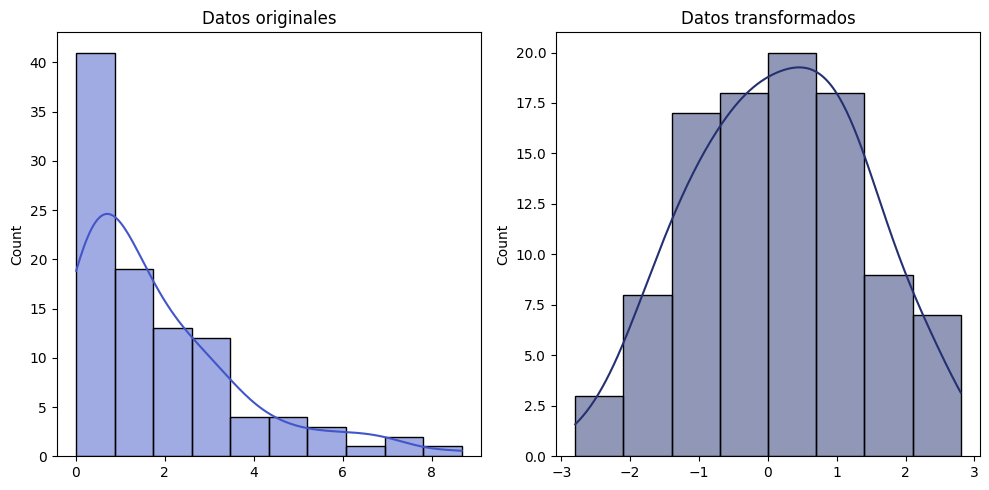

In [30]:
#graficar los datos originales y transformados utilizando matplitlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='#4256C9')
plt.title('Datos originales')

plt.subplot(1, 2, 2)
sns.histplot(data_boxcox, kde=True, color='#253070')
plt.title('Datos transformados')

plt.tight_layout()
plt.show()

### **5.**	Preguntas

**1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

Con la transformacion del Box-Cox corrigio los datos con sesgo y trato de acercar los datos a la normalidad por el parametro de lambda.

**2. ¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**

Dependiendo a que valor de lambda se podia se hizo la transformacion, ejemplo:

Valor de lamda:

*Lamda = 1 como es un dato que ya estaba casi normal, entonces no tenia un tipo de transformacion.

*Lamda = 0 entonces se se usaba log por la asimetria positiva que tenia.

*Lamda = 0.5 se usaba raiz cuadrada por ser positiva tambien.

*Lamda = -1 se usaba (1/x) por ser negativa.